/Users/ehudthelefthand/Workspace/pea/data-analytics-with-generative-ai/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
22:30:53 - cmdstanpy - INFO - Chain [1] start processing
22:30:55 - cmdstanpy - INFO - Chain [1] done processing
/Users/ehudthelefthand/Workspace/pea/data-analytics-with-generative-ai/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3618 (\N{THAI CHARACTER YO YAK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ehudthelefthand/Workspace/pea/data-analytics-with-generative-ai/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3629 (\N{THAI CHARACTER O ANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ehudthelefthand/Workspace/pea/data-analyt

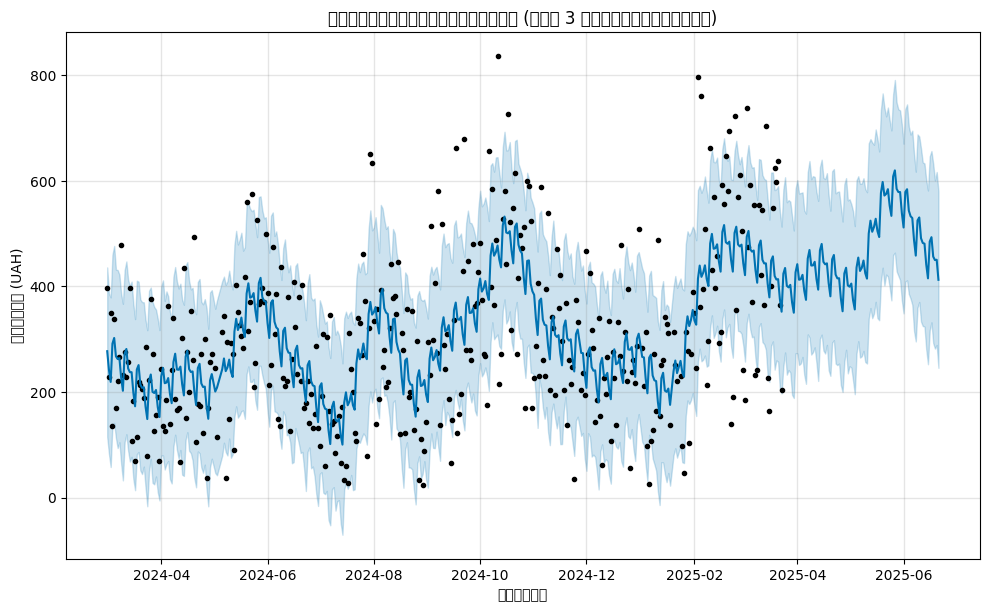

,ds,yhat,yhat_lower,yhat_upper
381,2025-03-24,424.033529,248.123714,584.038176
382,2025-03-25,434.991710,274.933667,606.907657
383,2025-03-26,401.198444,232.862640,559.568262
384,2025-03-27,398.209372,241.537729,563.530214
385,2025-03-28,403.006152,236.904609,560.785222
...,...,...,...,...
466,2025-06-17,493.327484,331.951277,656.513217
467,2025-06-18,456.520477,292.723729,632.585775
468,2025-06-19,449.972630,282.324075,600.907080
469,2025-06-20,450.569566,288.990615,616.868797


In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# 👇 Add this block to set Thai font for matplotlib
plt.rcParams['font.family'] = 'Tahoma'  # or 'Sarabun', 'Noto Sans Thai', etc.
# Ensure minus sign displays correctly
plt.rcParams['axes.unicode_minus'] = False

# 1. Load and Prepare Data
df = pd.read_csv("./source_data/coffee_sales.csv")
df['date'] = pd.to_datetime(df['date'])

# Aggregate to daily sales
daily_sales = df.groupby('date')['money'].sum().reset_index()
# Prophet ต้องใช้ชื่อคอลัมน์ ds = datetime, y = target
daily_sales.columns = ['ds', 'y']

# 2. สร้างโมเดลและ train
model = Prophet(daily_seasonality=True, yearly_seasonality=True)
model.fit(daily_sales)

# 3. สร้างช่วงวันที่จะพยากรณ์ (อนาคต 3 เดือน)
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

# 4. Visualize
fig1 = model.plot(forecast)
plt.title('พยากรณ์ยอดขายรายวัน (อีก 3 เดือนข้างหน้า)')
plt.xlabel('วันที่')
plt.ylabel('ยอดขาย (UAH)')
plt.show()

# 5. Optional: ดูเฉพาะช่วงที่ forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(90)